In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import random 


In [2]:
df = pd.read_csv("../Figure7_PLS-DA/pheno_terpenoids.tsv",sep="\t",index_col=0)
df.head()

,wf,thrips,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,10.873_119.0877,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
sample,,,,,,,,,,,,,,,,,,,,,
S lyc MM,non-toxic,non-toxic,0.00000,0.0,0.000,0.0000,88210.77165,0.00000,0.00000,32617.13711,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
S per LA1278,non-toxic,toxic,234383.78650,0.0,0.000,0.0000,131824.19000,0.00000,800290.02030,0.00000,...,0.0,0.0,0.0,9153.957334,0.0,0.0,0.0,0.0,0.0,0.0
S hua LA1364,non-toxic,non-toxic,0.00000,0.0,104528.752,45335.4665,27304.44693,90430.09761,0.00000,0.00000,...,0.0,0.0,0.0,5561.180230,0.0,0.0,0.0,0.0,0.0,0.0
S che LA1401,non-toxic,toxic,0.00000,0.0,0.000,0.0000,457891.15640,0.00000,32459.72293,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
S pim LA1578,non-toxic,toxic,12809.66965,0.0,0.000,0.0000,221391.28520,0.00000,0.00000,24737.81096,...,0.0,0.0,0.0,9495.496480,0.0,0.0,0.0,0.0,0.0,0.0


# Whitefly analysis

## get the X and y arrays

In [3]:
# get whitefly classes
y = df["wf"].tolist()
stratify_info = df['wf'].map({'non-toxic': 0, 'toxic': 1})

# get matrix X of volatile values
X = df.iloc[:,2:]
X.head()

,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,10.873_119.0877,11.056_91.0567,11.572_91.0564,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
sample,,,,,,,,,,,,,,,,,,,,,
S lyc MM,0.00000,0.0,0.000,0.0000,88210.77165,0.00000,0.00000,32617.13711,0.00000,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
S per LA1278,234383.78650,0.0,0.000,0.0000,131824.19000,0.00000,800290.02030,0.00000,55971.00761,0.000,...,0.0,0.0,0.0,9153.957334,0.0,0.0,0.0,0.0,0.0,0.0
S hua LA1364,0.00000,0.0,104528.752,45335.4665,27304.44693,90430.09761,0.00000,0.00000,0.00000,624085.817,...,0.0,0.0,0.0,5561.180230,0.0,0.0,0.0,0.0,0.0,0.0
S che LA1401,0.00000,0.0,0.000,0.0000,457891.15640,0.00000,32459.72293,0.00000,34284.95912,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
S pim LA1578,12809.66965,0.0,0.000,0.0000,221391.28520,0.00000,0.00000,24737.81096,0.00000,0.000,...,0.0,0.0,0.0,9495.496480,0.0,0.0,0.0,0.0,0.0,0.0


## Define function to run the Random Forest 

In [4]:
# define main random forest routine.. uses 6 splits to partition data
from sklearn.metrics import classification_report

def single_run(X,y,rs,disp=False,nb_of_splits = 6,nb_of_trees=1000):
    """
    This function takes a feature matrix (X) and a label array (y) and fits 
    a number of random forest classifier based on the specified number of splits. 
    """

    number_of_splits = nb_of_splits
    
    # create dataframes to accomodate computed values for each variable importance + real/predicted y values
    variableImportance = pd.DataFrame(np.zeros([X.shape[1],number_of_splits]))    
    dfy = pd.DataFrame(y,columns=['tox'])
    yhat = pd.DataFrame(['']*len(y),columns=['predict_tox'],dtype=np.str)
    
    # Stratified K-fold cross validator: provides train/test indices to split data in train/test sets
    kfold = StratifiedKFold(n_splits=number_of_splits,random_state=rs)
    
    splitnr = 0
    
    # Splits the X and y arrays n times (as specified by number of splits)
    # Initialise a Random Forest classifier with the specified number of trees and using class weights. 
    # Random state is fixed so that results are reproducible from run to run.
    for train_index, test_index in kfold.split(X,y):
        nt = 1/sum(stratify_info[train_index]==0) # calculates a weight for the non-toxic class (corrects for class imbalance)
        tx = 1/sum(stratify_info[train_index]==1) # calculates a weight for the toxic class (corrects for class imbalance)   
        rf = RandomForestClassifier(n_estimators=nb_of_trees,
                                    class_weight={"toxic":tx,"non-toxic":nt},
                                    random_state=rs)

        rf = rf.fit(X.iloc[train_index,:],dfy.iloc[train_index].values.ravel())

        # predict class values
        y_pred = rf.predict(X.iloc[test_index,:])
        for j in range(len(y_pred)):    
            yhat.iloc[test_index[j]] = y_pred[j]    
                  
        variableImportance.iloc[:,splitnr] = rf.feature_importances_
        splitnr+=1
        
    if disp:
        print(classification_report(y, yhat))
        pdata = variableImportance.copy()
        pdata.rename(columns={i:'split{0}'.format(i) for i in range(6)},inplace=True)
        pdata['x'] = range(variableImportance.shape[0])
        pdata.head()
        sns.lineplot(data=pdata)
    
    return [variableImportance,yhat]

## Extract feature importance from the RF runs

In [5]:
feature_importance=pd.DataFrame(columns=['run{0}'.format(i+1) for i in range(5)])
feature_importance_sd=pd.DataFrame(columns=['run{0}'.format(i+1) for i in range(5)])

yhat = pd.DataFrame(columns=['run{0}'.format(i+1) for i in range(5)])

#run the normal procedure 5 times with different seeds
#concatenate the predicted y's and the feature importance for analysis later
for i in range(5):
    vi,yh = single_run(X,y,i,False)
    
    feature_importance.iloc[:,i] = vi.mean(axis=1)
    feature_importance_sd.iloc[:,i] = vi.std(axis=1)
    yhat.iloc[:,i]=yh.iloc[:,0]


In [6]:
# determine the average en std deviations 
mean_varimportance = feature_importance.mean(axis=1)
# sum the variances (=squared std) and then take the mean
pooled_std = np.sqrt((feature_importance_sd**2).mean(axis=1))

# create panda for convenience
yerr = pd.concat([mean_varimportance-2*pooled_std, mean_varimportance,mean_varimportance+2*pooled_std],axis=1)

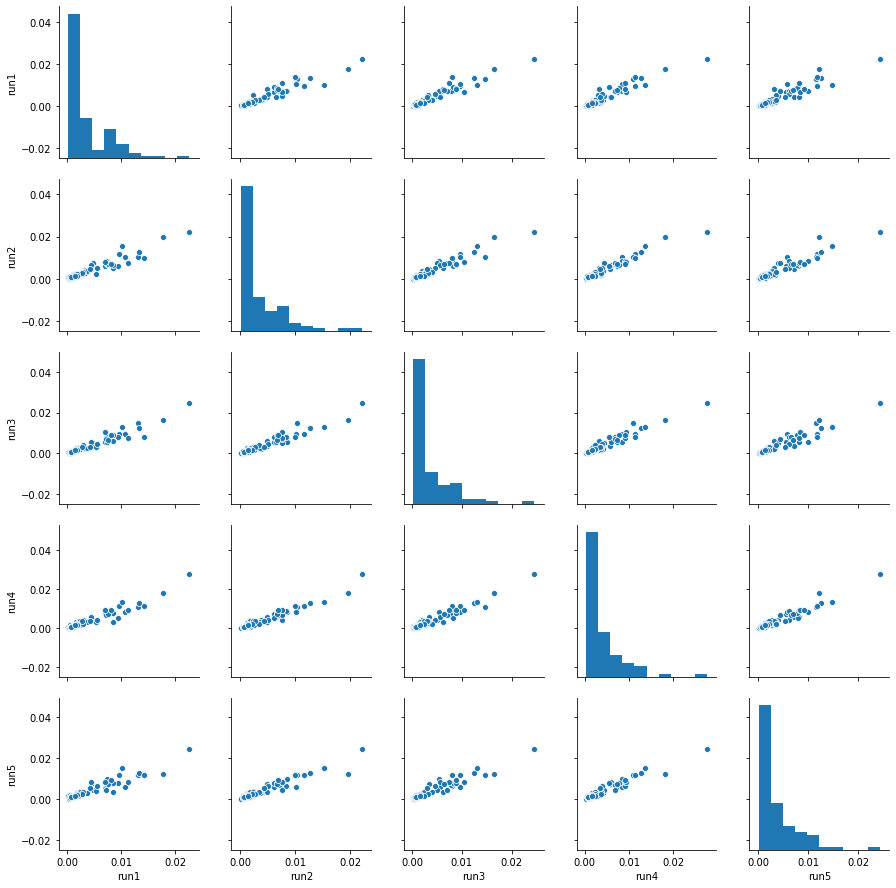

In [7]:
# plot the variable importances for each run and compare them to each other -> gives idea of stability 
sns.pairplot(data=feature_importance_sd)

# Permutations to extract p-values for each feature importance

In [8]:
nrperm = 100
yperms = pd.DataFrame(columns=['perm{0}'.format(i+1) for i in range(nrperm)])
secure_random = random.SystemRandom()

In [9]:
feature_importance_perm=pd.DataFrame(columns=['perm{0}'.format(i+1) for i in range(nrperm)])
yhat_perm=pd.DataFrame(columns=['perm{0}'.format(i+1) for i in range(nrperm)])

# create dataframe with y vector
dfy = pd.DataFrame(y,columns=['tox'])


for perm in range(nrperm):    
    # generate random numbers
    randomfloat = [secure_random.random() for r in range(len(y))]
    # create new ynew matrix
    ynew = dfy.iloc[np.argsort(randomfloat)]
    # reindex the vector
    ynew.index = range(len(y))
    # store this matrix for later
    yperms.iloc[:,perm]=ynew.iloc[:,0].copy()
    
    # set to fixed seed 1234 (arbitraryly)
    a,yh = single_run(X,ynew,1234,False)
    feature_importance_perm.iloc[:,perm] = a.mean(axis=1)
    yhat_perm.iloc[:,perm]=yh.iloc[:,0]
    

In [10]:
# routine to determine pvalue of average value (x) based on results scored by random generated data (X)
def iperc(x,X):
    
    df = pd.DataFrame(index=X.index,columns=['p-value'])
    
    for i in range(len(x)):            
        pn = sum(X.iloc[i,:]<x.iloc[i])/X.shape[0]
        pp = sum(X.iloc[i,:]>=x.iloc[i])/X.shape[0]
    
        df.iloc[i] = min(pn,pp)
            
    return df
    

In [11]:
# create some pandas just for plotting 
minp = feature_importance_perm.min(axis=1)
maxp = feature_importance_perm.max(axis=1)

yerr_plot = pd.concat([minp, mean_varimportance,maxp],axis=1)
yerr_plot.columns = ['min_perm','avg','max_perm']
yerr_plot['sig']=(minp>mean_varimportance) | (maxp<mean_varimportance)
yerr_plot['x'] = range(yerr.shape[0])

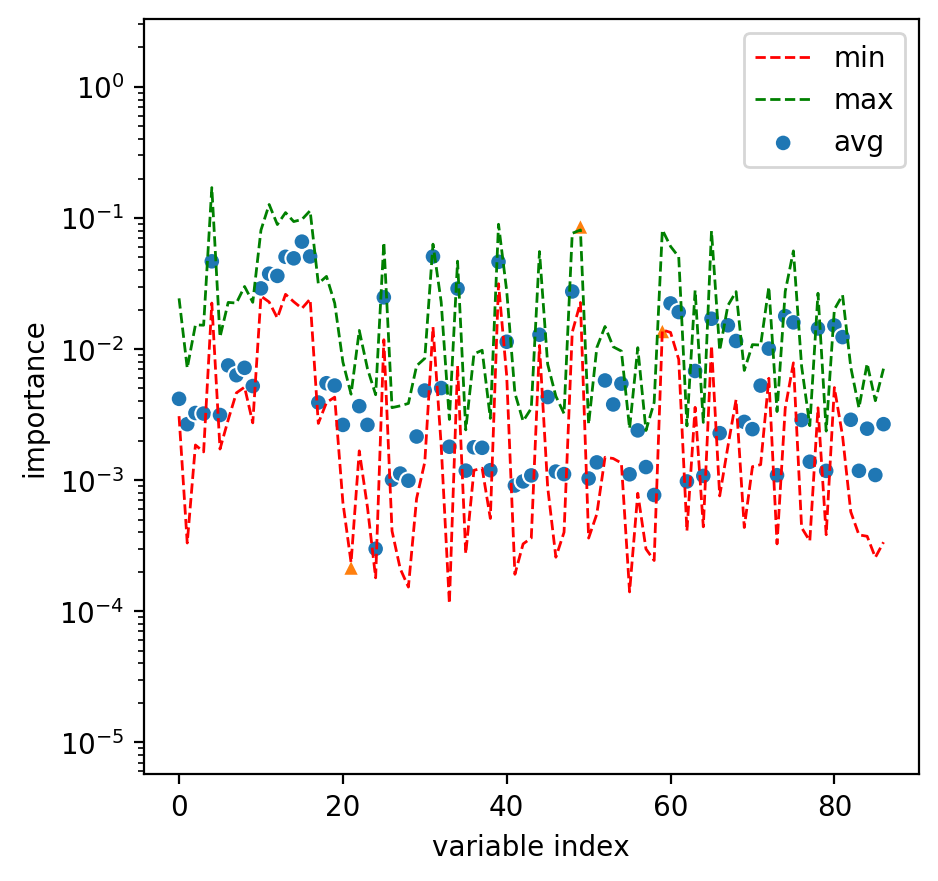

In [12]:
fig,ax = plt.subplots(figsize=([5,5]),dpi=200)
ax.set(yscale='log')
sns.scatterplot(x='x',y='avg',data=yerr_plot,markers=['o','^'],hue='sig',style='sig')
sns.lineplot(x='x',y='min_perm',data=yerr_plot,color='red')
sns.lineplot(x='x',y='max_perm',data=yerr_plot,color='green')

ax.lines[0].set_linestyle('--')
ax.lines[0].set_linewidth(1)

ax.lines[1].set_linestyle('--')
ax.lines[1].set_linewidth(1)

plt.legend(['min','max','avg'])

plt.xlabel('variable index')
plt.ylabel('importance');


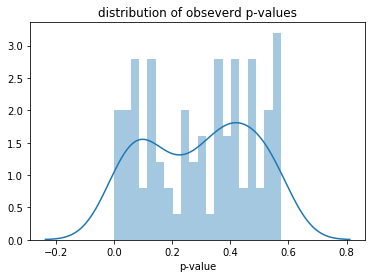

In [13]:
mi = mean_varimportance
pvalues = iperc(mi,feature_importance_perm)
sns.distplot(pvalues.iloc[:,0].astype('float'),20)
plt.title('distribution of obseverd p-values');

In [14]:
pvalues.loc[pvalues['p-value']<0.05,:]

,p-value
0,0.045977
10,0.0344828
18,0.0344828
19,0.0229885
21,0
24,0.0114943
31,0.0344828
44,0.0344828
49,0
59,0


In [15]:
# only select those variables that have p-value smaller than 0.05 (after bonferroni correction)
#mysel = pvalues.loc[pvalues.iloc[:,0]<(0.05/X.shape[0]),:].sort_values('p-value')
mysel = pvalues.loc[pvalues.iloc[:,0]<0.05,:].sort_values('p-value')

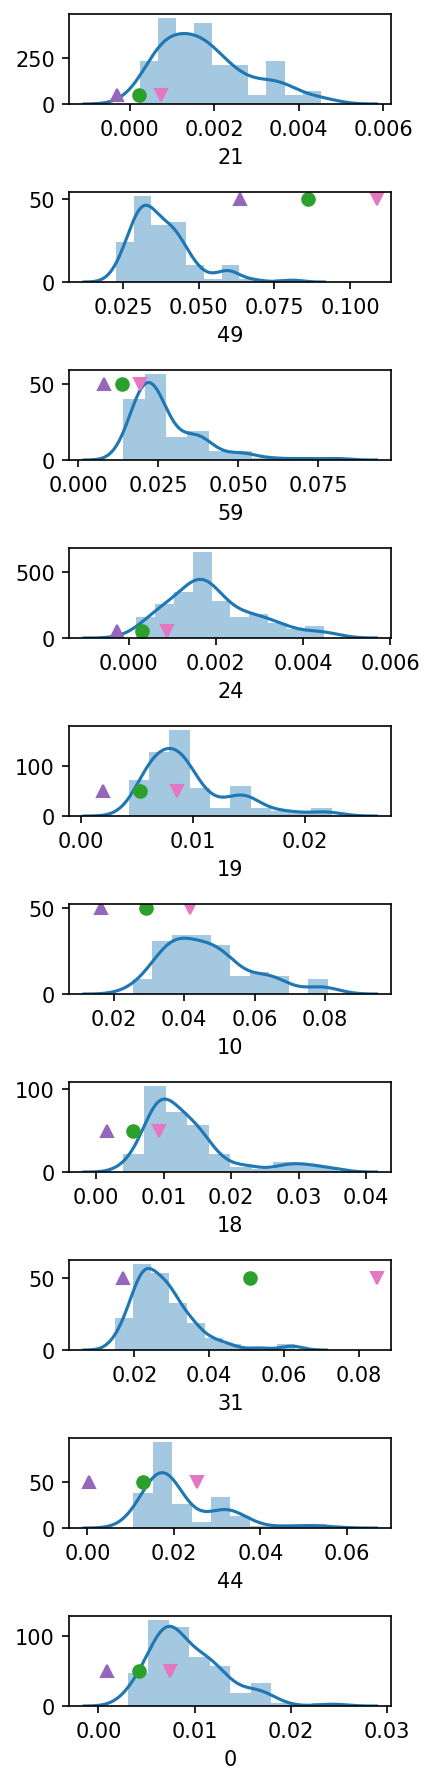

In [16]:
# plot those variables
nrplots = len(mysel.index.values)
fig = plt.figure(figsize=([3,12]),dpi=150)
ax = fig.subplots(nrows=nrplots,ncols=1)

yerr = pd.concat([mean_varimportance-2*pooled_std, mean_varimportance,mean_varimportance+2*pooled_std],axis=1)

for i in range(nrplots):                
    plt.subplot(ax[i])
    sns.distplot(feature_importance_perm.iloc[mysel.index.values[i],:],bins=10,ax=ax[i])
    plt.plot(mi[mysel.index.values[i]],0,mi[mysel.index.values[i]],50,'o')
    plt.plot(yerr.iloc[mysel.index.values[i],0],0,yerr.iloc[mysel.index.values[i],0],50,'^')
    plt.plot(yerr.iloc[mysel.index.values[i],2],0,yerr.iloc[mysel.index.values[i],2],50,'v')

    
plt.tight_layout()